### Original

Tải tập dữ liệu WELFake

In [1]:
!gdown 1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3

Downloading...
From (original): https://drive.google.com/uc?id=1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3
From (redirected): https://drive.google.com/uc?id=1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3&confirm=t&uuid=85e6d141-9884-41be-a2df-4ff8ee05d031
To: /content/WELFake_Dataset.csv
100% 245M/245M [00:05<00:00, 47.1MB/s]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/content/WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


Xóa các kí tự null và nối cột title vào cột test

In [3]:
df.dropna(subset = ['text', 'title'], inplace = True)
df['text'] = df['title'] + ' ' + df['text']
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...","Bobby Jindal, raised Hindu, uses story of Chri...",0
4,4,SATAN 2: Russia unvelis an image of its terrif...,SATAN 2: Russia unvelis an image of its terrif...,1
5,5,About Time! Christian Group Sues Amazon and SP...,About Time! Christian Group Sues Amazon and SP...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,Russians steal research on Trump in hack of U....,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,WATCH: Giuliani Demands That Democrats Apolog...,1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,Trump tussle gives unpopular Mexican leader mu...,0


In [5]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape

(57229,)

In [7]:
X_test.shape

(14308,)

TF-IDF

In [8]:
# Vector hóa văn bản bằng TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

Huấn luyện mô hình

In [9]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=5, cv=3, n_jobs=2, random_state=42, verbose=2)
random_search.fit(X_train_tfidf, y_train)

best_rf_model = random_search.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


Đánh giá mô hình 

In [10]:
y_pred = best_rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9490494828068213
Precision: 0.9297619047619048
Recall: 0.9726027397260274
F1-score: 0.9506999391357274
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      7081
           1       0.93      0.97      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



Vẽ ma trận nhầm lẫn 

Text(70.72222222222221, 0.5, 'Real Labels')

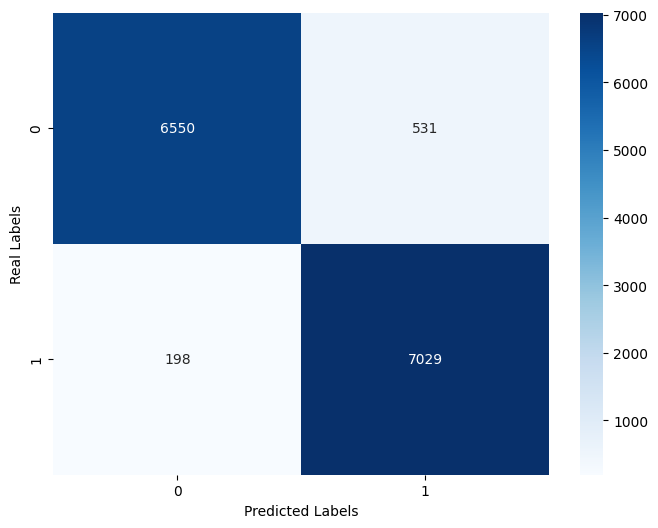

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

### SR

Thực hiện tăng cường dữ liệu bằng cách thay thế từ đồng nghĩa (SR)

In [14]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def replace_synonyms(text):
    words = word_tokenize(text)
    replaced_text = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            replaced_text.append(synonym.replace('_', ' '))
        else:
            replaced_text.append(word)
    return ' '.join(replaced_text)

def remove_function_words(text):
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def preprocess_txt(text, use_synonyms=False, use_fwd=False):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    if use_synonyms:
        text = replace_synonyms(text)

    if use_fwd:
        text = remove_function_words(text)

    tokens = word_tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens]

    unique_tokens = []
    for token in tokens:
        if token not in unique_tokens:
            unique_tokens.append(token)

    preprocessed_text = ' '.join(unique_tokens)
    return preprocessed_text

df['preprocessed_text'] = df['text'].apply(lambda x: preprocess_txt(x, use_synonyms=True, use_fwd=False) if isinstance(x, str) else "")

X = df['preprocessed_text']
y = df['label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(14308,)

In [16]:
# Vector hóa văn bản bằng TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Huấn luyện mô hình
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=5, cv=3, n_jobs=2, random_state=42, verbose=2)
random_search.fit(X_train_tfidf, y_train)

best_rf_model = random_search.best_estimator_

# Đánh giá mô hình
y_pred = best_rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy: 0.9476516634050881
Precision: 0.9434556407447974
Recall: 0.9535076795350768
F1-score: 0.9484550271832634
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7081
           1       0.94      0.95      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



Vẽ ma trận nhầm lẫn 

Text(70.72222222222221, 0.5, 'Real Labels')

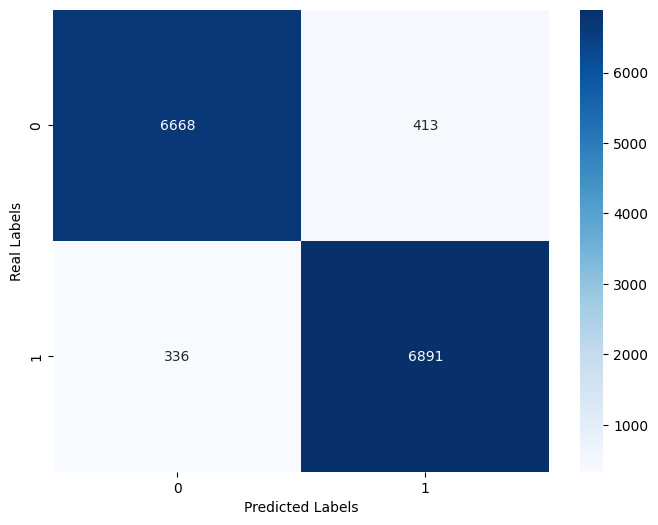

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

### FWD

Thực hiện tăng cường dữ liệu xóa các từ không cần thiết (FWD)

In [18]:
df['preprocessed_text'] = df['text'].apply(lambda x: preprocess_txt(x, use_synonyms=False, use_fwd=True) if isinstance(x, str) else "")

X = df['preprocessed_text']
y = df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(14308,)

In [20]:
# Vector hóa văn bản bằng TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Huấn luyện mô hìnhhình
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=5, cv=3, n_jobs=2, random_state=42, verbose=2)
random_search.fit(X_train_tfidf, y_train)

best_rf_model = random_search.best_estimator_

# Đánh giá mô hình 
y_pred = best_rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy: 0.9391948560246016
Precision: 0.9199365834324217
Recall: 0.9634703196347032
F1-score: 0.9412003244120033
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7081
           1       0.92      0.96      0.94      7227

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308



Vẽ ma trận nhầm lẫn 

Text(70.72222222222221, 0.5, 'Real Labels')

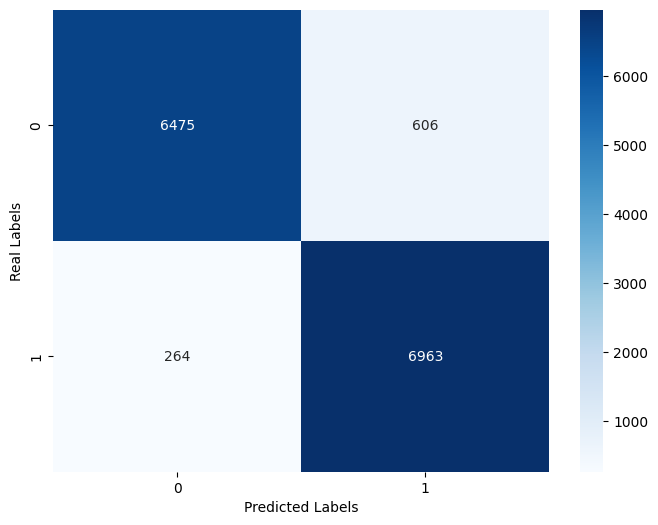

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')